# 5 Pixel classification

In this example we will classify the pixels in an image as being either 'land' or 'other'. We will use the pixel values as features to our classifier.

In [1]:
from IPython import display

import pandas as pd

import numpy as np

# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

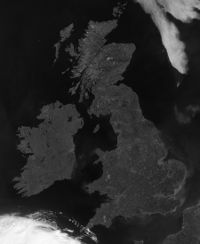

In [2]:
# Have a look at the image data/uk_ire_gray.png to see the input image.
display.Image("data/uk_ire_gray.png")

In [3]:
# load the grayscale image we wish to classify from its csv file
# 0 represents black and 255 represents white
im = pd.read_csv("data/uk_ire_gray.csv", header=None)
height, width = im.shape
print("Height in pixels:", height)
print("Width in pixels:", width)

Height in pixels: 244
Width in pixels: 200


In [4]:
# create training data as DataFrame
# pick some pixel locations in screen space that we know to be land and not land
train_x = np.array([0.75, 0.30, 0.20, 0.95, 0.75]) * width
train_y = np.array([0.20, 0.50, 0.70, 0.40, 0.95]) * height
class_names = ["land", "land", "other", "other", "other"]

<AxesSubplot:>

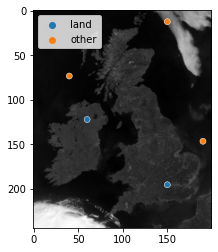

In [5]:
# plot the input image
plt.imshow(im, cmap="gray")

# plot the training datapoints as coloured circles
sns.scatterplot(
    x=train_x,
    y=height - train_y,
    hue=class_names,
)

In [6]:
# here we extract the pixel values at our training locations
train_pixels = im.values[train_y.astype(int), train_x.astype(int)]

In [7]:
# train classifer
rf = RandomForestClassifier()
rf.fit(train_pixels.reshape(-1, 1), class_names)

RandomForestClassifier()

In [8]:
# create test data - convert image into pixels
test_data = im.values.reshape(-1, 1)

In [9]:
# perform classification on the whole image
# here we will get the random forest to return a probability
im_prediction = rf.predict_proba(test_data)

In [10]:
# extract the prediction for land - the probability of the first class
prob_land = im_prediction[:, 0]

In [11]:
# convert the prediction from a vector to a matrix
prob_land_matrix = prob_land.reshape(height, width)

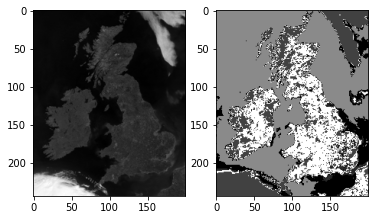

In [12]:
# plot the original image
ax1 = plt.subplot(1, 2, 1)
ax1.imshow(im, cmap="gray")

# plot the prediction as a new image on the right
ax2 = plt.subplot(1, 2, 2)
ax2.imshow(prob_land_matrix, cmap="gray")

In [13]:
# compute the percentage of pixels that are predicted as land
percent_land_cover = (prob_land_matrix > 0.5).mean() * 100
print("Predicted percentage of land pixels (%):", percent_land_cover)

Predicted percentage of land pixels (%): 22.01639344262295
